In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = open('cv3.txt')
data = pd.read_csv(path, header=None, names=['Exam1', 'Exam2', 'Admitted'])
data.head(10)

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [7]:
data.describe()

,Exam1,Exam2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


Text(0, 0.5, 'Exam2 score')

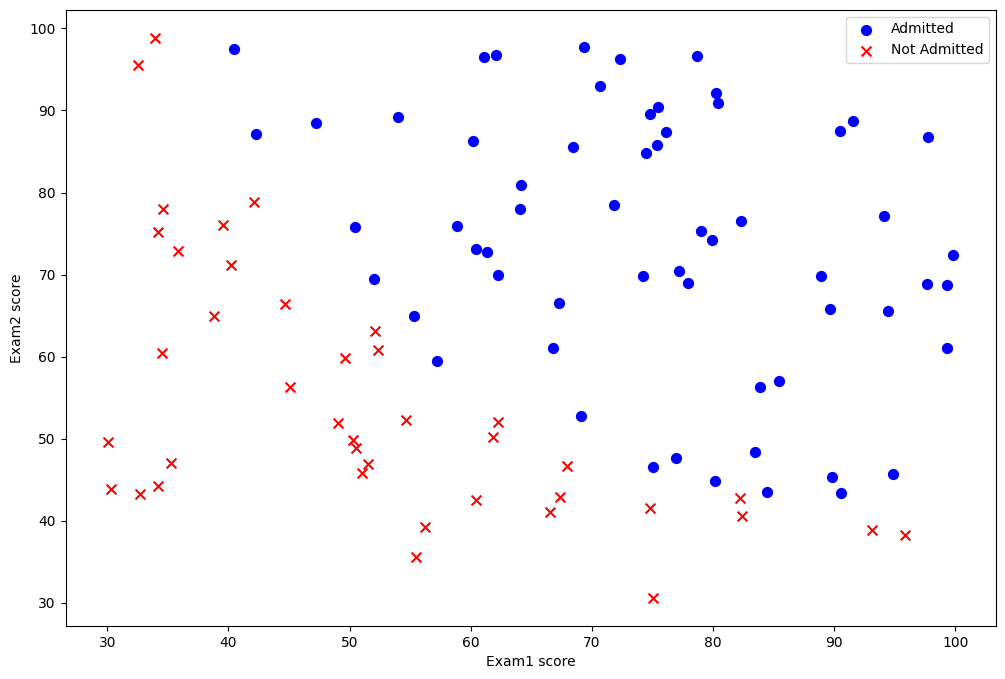

In [4]:
positive = data[data['Admitted'].isin([1])]  #matchuje se řádek že byl admitted true? nebo false na řádku níž
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam1 score')
ax.set_ylabel('Exam2 score')

In [8]:
#logistická fce, sigmoida, převádí vstup s mnoha reálnými čísly pouze na jedničky a nuly tedy na ty co prošli a ty co ne
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

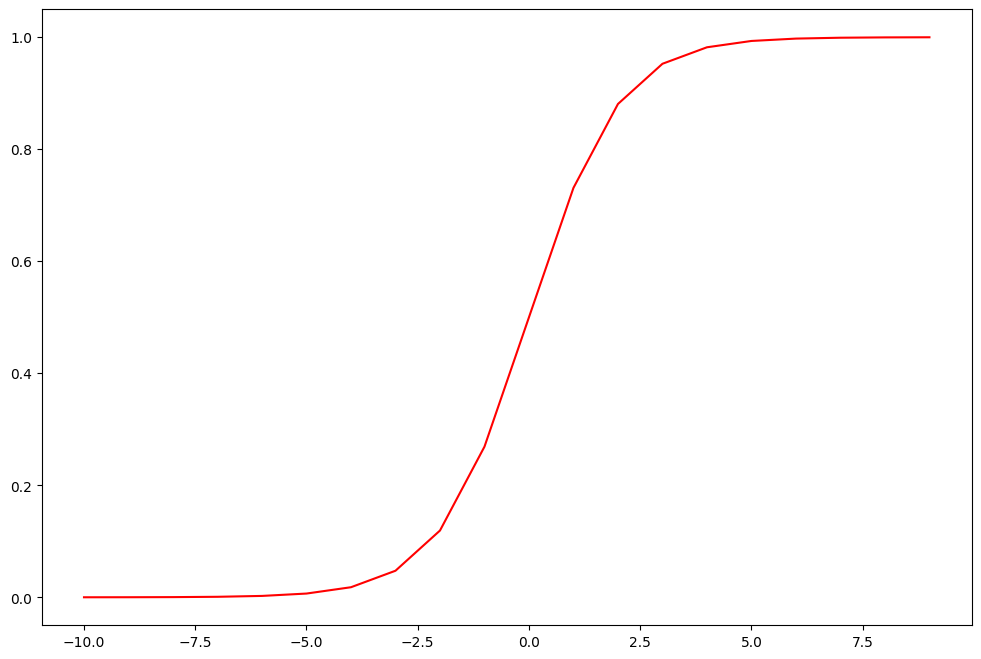

In [9]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(nums, sigmoid(nums), 'r')

In [10]:
#definice chybové funkce
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [11]:
#přidání sloupce jedniček
data.insert(0, 'Jednicky', 1)

#nastaveni X (trenovací data) a y (vystupni proměnná)
cols = data.shape[1]
X = data.iloc[:, 0:cols - 1]
y = data.iloc[:, cols - 1:cols]

#prevod numpy polí a inicializace parametru theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [12]:
#kontrola formátu dat

X.shape, theta.shape, y.shape

((100, 3), (3,), (100, 1))

In [15]:
print(theta)
print(X)
print(y)

[0. 0. 0.]
[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]
 [ 1.         45.08327748 56.31637178]
 [ 1.         61.10666454 96.51142588]
 [ 1.         75.02474557 46.55401354]
 [ 1.         76.0987867  87.42056972]
 [ 1.         84.43281996 43.53339331]
 [ 1.         95.86155507 38.22527806]
 [ 1.         75.01365839 30.60326323]
 [ 1.         82.30705337 76.4819633 ]
 [ 1.         69.36458876 97.71869196]
 [ 1.         39.53833914 76.03681085]
 [ 1.         53.97105215 89.20735014]
 [ 1.         69.07014406 52.74046973]
 [ 1.         67.94685548 46.67857411]
 [ 1.         70.66150955 92.92713789]
 [ 1.         76.97878373 47.57596365]
 [ 1.         67.37202755 42.83843832]
 [ 1.         89.67677575 65.79936593]
 [ 1.         50.53478829 48.85581153]
 [ 1.         34.21206098 44.2095286 ]
 [ 1.         77.92409145 68.97235999]
 [ 1.         

In [18]:
#chyba pro výchozí řešení
cost(theta, X, y)

0.6931471805599453

In [20]:
#neprovádí gradientní sestup, ale pouze jen jeden krok
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:, i])
        grad[i] = np.sum(term) / len(X)

    return grad

In [22]:
#funkce, která využívá gradient
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X,y))
cost(result[0], X, y)

0.20349770158947447

In [23]:
#máme optimální parametry modelu
#fce, která predikuje X pomocí parametru theta, může se využít na zjištění přesnosti klasifikace
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability] #vrací 0 nebo 1 podle pravděpodobnosti zda je větší nebo rovna 0.5

In [25]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct))% len(correct))
print(accuracy) #přesnost klasifikace nad trénovacími daty

89
